### 몇 개의 사인 함수를 만들어 보자. seaborn을 import 할 때는 matplotlib도 같이 import 해야한다.

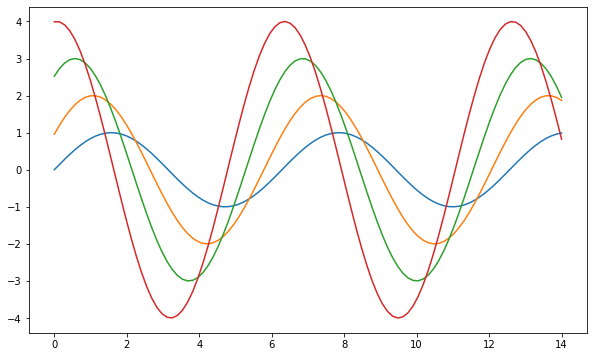

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns

x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

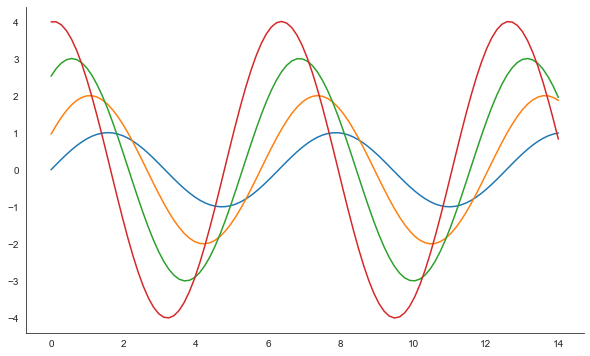

In [5]:
sns.set_style("white")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)

sns.despine()

plt.show()

In [8]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


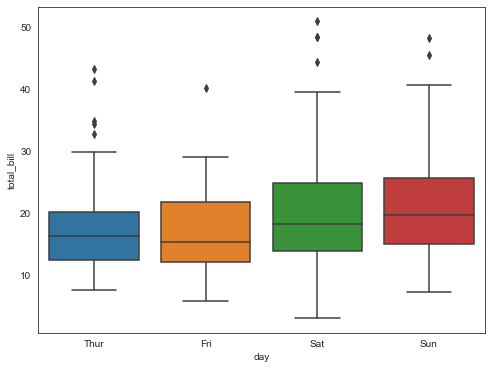

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill",data=tips)
plt.show()

In [10]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### 연도 및 월별 항공기 승객수를 기록한 데이터를 가져와 보자

In [11]:
flights = flights.pivot("month","year","passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### pivot 기능으로 간편하게 월별, 연도별로 구분할 수 있습니다. 앞서 언급했다시피 pivot을 상상할 수만 있다면 꽤 유용한 결과를 얻습니다.

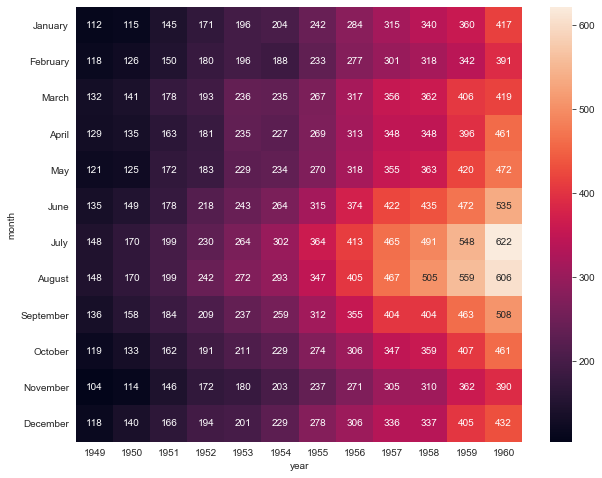

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(flights,annot=True,fmt="d")
plt.show()

### heatmap 이라는 도구를 이용하면 이런 종류의 데이터는 그 경향을 설명하기 참 좋습니다.

In [14]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 아이리스 꽃에 대한 데이터를 가지고 오는데 꽃잎, 꽃받침의 너비와 폭을 가지고 그 종을 구분할 수 있는지를 알아보자, 여기서는 pairplot 이라는 정말 깔끔한 명령이 있다.

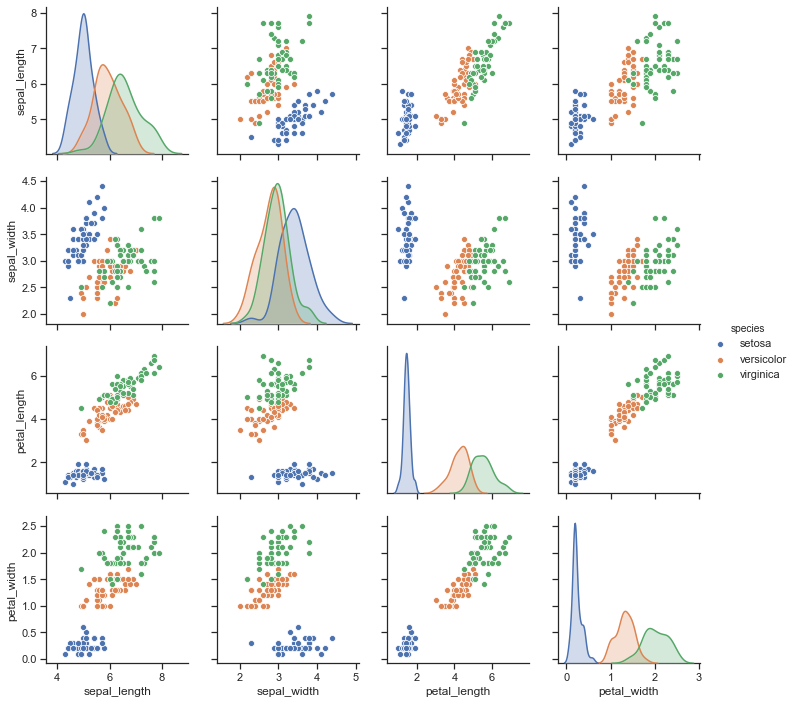

In [17]:
sns.pairplot(iris,hue="species")
plt.show()

### +++ 2-8 범죄 데이터 시각화 하기 +++

In [25]:

import pandas as pd
import numpy as np

crime_anal_raw = pd.read_csv('../data/02_crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8', index_col=0)

crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)

crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)


In [28]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]

result_CCTV = pd.read_csv('../data/01_CCTV_result.csv', encoding='UTF-8', 
                          index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]

col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)

col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)

In [29]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font', family="AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system... sorry~~~~')

C:\Users\student\Anaconda3\envs\camp\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\student\Anaconda3\envs\camp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\camp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


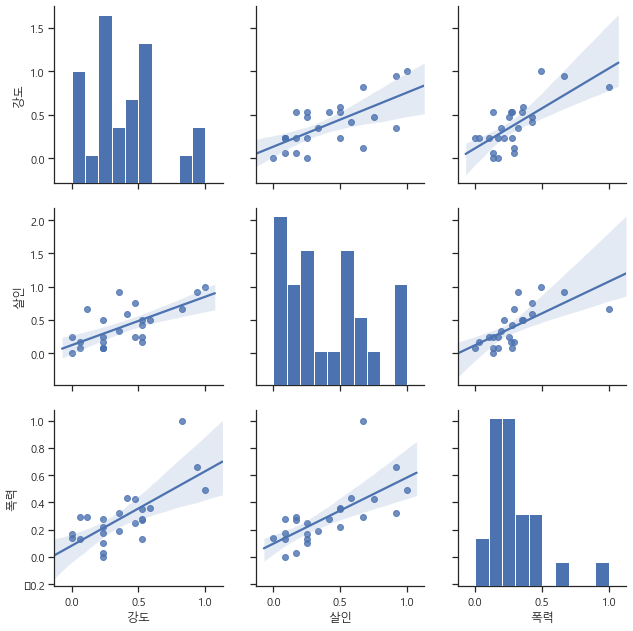

In [30]:
sns.pairplot(crime_anal_norm, vars=['강도','살인','폭력'],kind='reg',size=3)
plt.show()

### 인구수와 CCTV 개수, 그리고 살인과 강도에 대해 조사했다. 전체적인 상관계수는 CCTV와 살인의 관계가 낮을지 몰라도 CCTV가 없을 때 살인이 일어나는 구간이 있다. 즉 CCTV 개수를 기준으로 좌측면에 살인과 강도의 높은 수를 갖는 데이터가 보입니다.

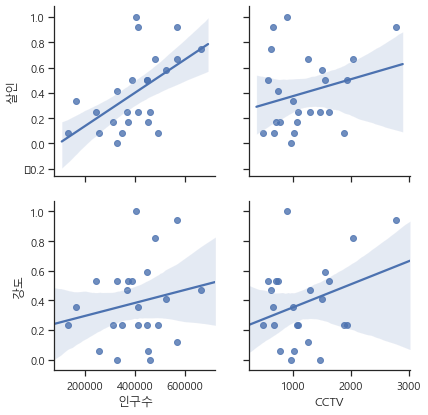

In [33]:
sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"],
           y_vars=["살인","강도"],kind='reg', size=3)
plt.show()